# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

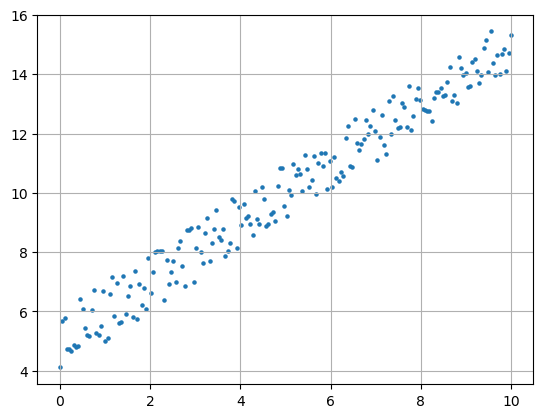

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 200)
y = 5 + x + np.random.uniform(-1, 1, 200)

plt.figure()
plt.scatter(x, y, s=5) #s es para el tamaño de los puntos
plt.grid()

In [7]:
import scipy.optimize as opt

In [9]:
opt.minimize?

In [41]:
X.shape

(200, 2)

In [42]:
def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [43]:
m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])

X = np.hstack((ones, x1))


In [44]:
beta_inicial = np.random.rand(2, 1)
beta_inicial

array([[0.13089745],
       [0.81720101]])

In [45]:
y_vector = np.reshape(y, [m, 1])

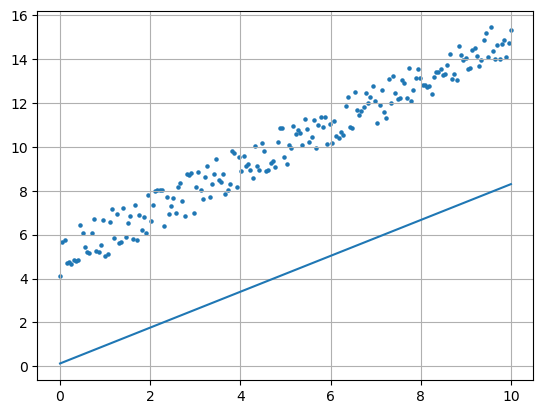

In [46]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X@beta_inicial)
plt.grid()

In [47]:
funcion_de_costo(beta_inicial, X, y_vector)

6781.902618353264

In [50]:
sol = opt.minimize(funcion_de_costo, beta_inicial, args = (X, y_vector))
beta = np.reshape(sol.x, [2, 1])
beta

C:\Users\diego\AppData\Local\Temp\ipykernel_4116\1481688344.py:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  sol = opt.minimize(funcion_de_costo, beta_inicial, args = (X, y_vector))


array([[5.02288462],
       [0.9932622 ]])

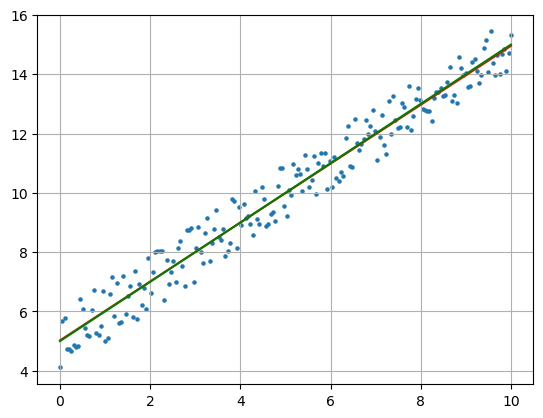

In [51]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X@beta, "r")
plt.grid()
plt.plot(x, 5+x, "g")

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

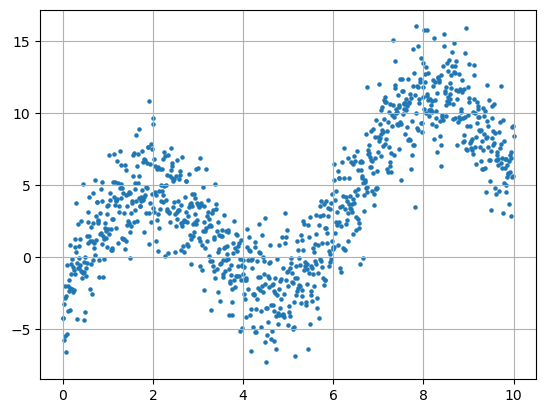

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.linspace(0, 10, 1000)
y = 5 * np.sin(x) + x - np.cos(x) + np.random.normal(-2, 2, 1000)

plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

In [26]:
def funcion_de_cost(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = (prediccion - y)
    return (error.T @ error)[0][0]

In [27]:
# f(x) = b0 + b1*x + b2*x^2 + b3*x^3 + b4*x^4
m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])
x4 = np.reshape(x**4, [m, 1])

X = np.hstack((ones, x1, x2, x3, x4))


In [28]:
beta_inicial = np.random.rand(5)
y_vec = np.reshape(y, [m, 1])


In [29]:
import scipy.optimize as opt
sol = opt.minimize(funcion_de_cost, 
                   beta_inicial,
                   args=(X, y_vec))
sol

      fun: 4899.027085096253
 hess_inv: array([[ 1.23511909e-02, -1.48139205e-02,  5.18226648e-03,
        -6.90622700e-04,  3.10624751e-05],
       [-1.48139205e-02,  2.37647274e-02, -9.36243965e-03,
         1.33157557e-03, -6.24059456e-05],
       [ 5.18226648e-03, -9.36243965e-03,  3.93572463e-03,
        -5.83183921e-04,  2.81154658e-05],
       [-6.90622700e-04,  1.33157557e-03, -5.83183921e-04,
         8.88911254e-05, -4.37497426e-06],
       [ 3.10624751e-05, -6.24059456e-05,  2.81154658e-05,
        -4.37497426e-06,  2.18748713e-07]])
      jac: array([ 0.        , -0.00012207,  0.00012207,  0.        , -0.00024414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 204
      nit: 6
     njev: 32
   status: 2
  success: False
        x: array([-5.020139  , 14.90014973, -7.23458751,  1.18540407, -0.0603278 ])

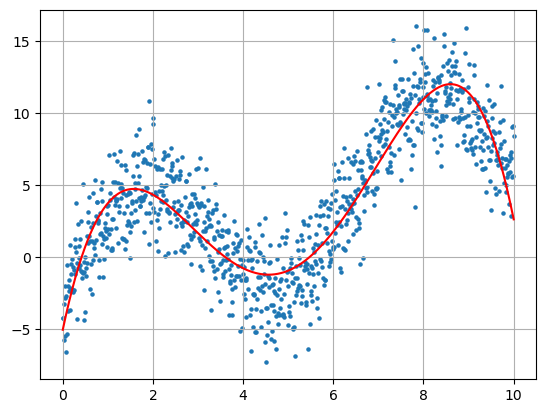

In [30]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X@sol.x, "r")
plt.grid()

In [31]:
5 * np.sin(x) + x - np.cos(x)

xsin = np.reshape(np.sin(x), [m, 1])
xcos= np.reshape(np.cos(x), [m, 1])

X2 = np.hstack((ones, xsin, x1, xcos))

beta_inicial2 = np.random.rand(4)

In [32]:
sol2 = opt.minimize(funcion_de_cost,
             beta_inicial2,
             args=(X2, y_vec))
sol2

      fun: 4160.054598274784
 hess_inv: array([[ 1.90032927e-03,  1.64315503e-04, -2.88876612e-04,
        -1.11677484e-04],
       [ 1.64315503e-04,  5.08543228e-04, -4.65015114e-05,
        -3.51615585e-04],
       [-2.88876612e-04, -4.65015114e-05,  5.99286927e-05,
         3.95799556e-05],
       [-1.11677484e-04, -3.51615585e-04,  3.95799556e-05,
         7.31497271e-04]])
      jac: array([ 6.10351562e-05, -6.10351562e-05,  0.00000000e+00,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 75
      nit: 9
     njev: 15
   status: 2
  success: False
        x: array([-2.0289576 ,  5.0608674 ,  1.01471274, -0.82644174])

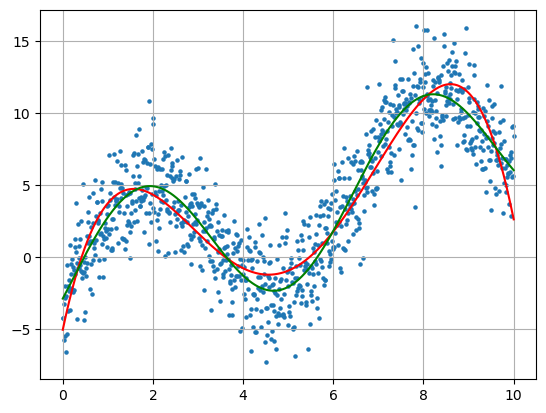

In [33]:
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(x, X@sol.x, "r")
plt.plot(x, X2 @ sol2.x, "g")
plt.grid()

(array([  8.,  19.,  70., 172., 209., 244., 163.,  79.,  30.,   6.]),
 array([-6.96896837, -5.58828281, -4.20759725, -2.82691169, -1.44622614,
        -0.06554058,  1.31514498,  2.69583054,  4.0765161 ,  5.45720166,
         6.83788722]),
 <BarContainer object of 10 artists>)

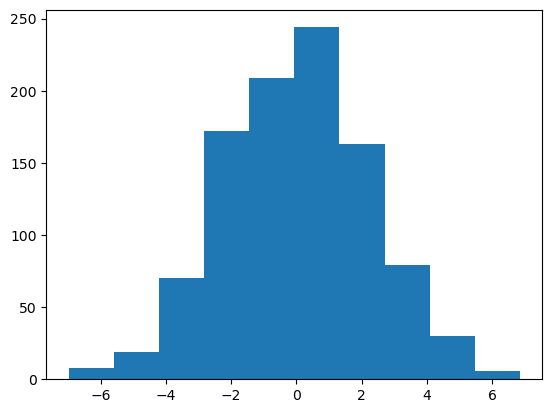

In [34]:
plt.figure()
plt.hist((X @ sol.x)- y)

(array([ 13.,  43., 126., 211., 262., 192., 107.,  38.,   7.,   1.]),
 array([-5.88215669, -4.5501613 , -3.21816592, -1.88617053, -0.55417514,
         0.77782024,  2.10981563,  3.44181102,  4.77380641,  6.10580179,
         7.43779718]),
 <BarContainer object of 10 artists>)

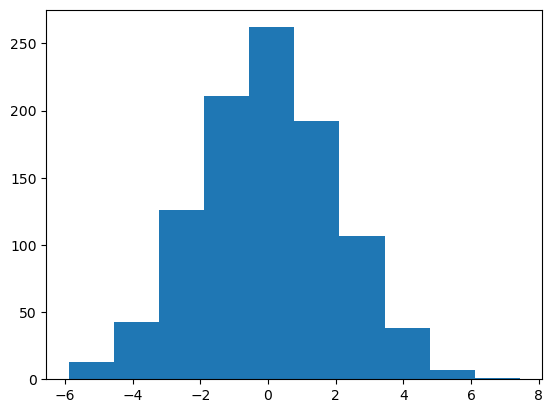

In [35]:
plt.figure()
plt.hist((X2 @ sol2.x)- y)

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.